In [1]:
from collections import defaultdict
import os
import pickle
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from scipy.cluster.hierarchy import fcluster, linkage, single
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open('../data/out7_final_pairwise_interaction_dict','rb') as f:
    interaction_dict = pickle.load(f)

In [4]:
interaction_dict.keys()

dict_keys(['4cpa', '5tln', '4tln', '6rsa', '1rnt', '6cha', '4ts1', '4tmn', '2tmn', '1tlp', '1tmn', '5tmn', '4fab', '1p01', '3at1', '6gch', '7gch', '8abp', '7abp', '6abp', '1fkf', '9icd', '4er1', '5er2', '2ypi', '6cpa', '3er3', '5er1', '9abp', '1bap', '5abp', '8gpb', '1apb', '7gpb', '1stp', '5est', '6tim', '6gpb', '9hvp', '4tim', '4phv', '1rne', '1fkb', '1gca', '1l83', '2avi', '1rin', '1dmb', '1atr', '1dbb', '1gpy', '1abf', '1rgl', '6rnt', '1rgk', '1cam', '3gst', '1cps', '2gst', '1ppm', '1hos', '1ppl', '1bcd', '1ivp', '1trd', '1mns', '1htf', '2hmb', '1dbj', '1hte', '2dbl', '1htg', '1acj', '1dbk', '1hsl', '2drc', '1sre', '1sri', '1tka', '1lst', '1tkc', '1avd', '1ctr', '1hgi', '1hgj', '1dhj', '1tys', '1pyg', '1adl', '1hge', '2cgr', '1dhi', '1srg', '1tni', '2ctc', '1add', '1elc', '1wht', '1tsi', '1cil', '2sim', '1thl', '1tnh', '1ela', '1cbx', '1inc', '1ppc', '1hps', '1azm', '1rpa', '1tng', '1pph', '1ett', '1cim', '1csi', '1cin', '1fki', '1rpf', '1gbt', '1fkg', '1tkb', '1nnb', '1tnj', '1ent

In [5]:
len(list(interaction_dict.keys()))

12987

In [6]:
pdb_id = list(interaction_dict.keys())[1]
pdb_id

'5tln'

In [7]:
interaction_entry = interaction_dict[pdb_id]
list(interaction_entry.keys())

['ligand',
 'atom_idx',
 'atom_name',
 'atom_element',
 'atom_interact',
 'atom_bond_type',
 'uniprot_id',
 'uniprot_seq',
 'interact_in_uniprot_seq',
 'residue_bond_type']

In [8]:
interaction_entry['ligand']

'BAN'

In [9]:
interaction_indices = [i for i, x in enumerate(interaction_entry['atom_interact']) if x == 1]
interaction_indices

[1, 9, 10, 11, 13, 14, 18]

In [10]:
interaction_entry['atom_name']

['OH1',
 'N1',
 'C1',
 'O1',
 'CA2',
 'CB2',
 'CG2',
 'CD1',
 'CD2',
 'CE1',
 'CE2',
 'CZ2',
 'C2',
 'O2',
 'N3',
 'CA3',
 'CB3',
 'C3',
 'O3',
 'N4',
 'CA4',
 'C4',
 'O4',
 'C10',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'N5',
 'O5',
 'O6',
 'N2',
 'H1',
 'H2',
 'H5',
 'H6',
 'H7',
 'H9',
 'H11',
 'H13',
 'H15',
 'H17',
 'H21',
 'H22',
 'H23',
 'H24',
 'H25',
 'H28',
 'H29',
 'H39',
 'H33',
 'H34',
 'H36',
 'H37',
 'H8']

In [11]:
list(set(interaction_entry['interact_in_uniprot_seq']))

[419, 361, 364, 433, 370, 434, 343]

In [12]:
interaction_entry['residue_bond_type']

[(361, 'Hydrophobic Interactions_0'),
 (364, 'Hydrophobic Interactions_1'),
 (370, 'Hydrophobic Interactions_2'),
 (419, 'Hydrophobic Interactions_3'),
 (433, 'Hydrophobic Interactions_4'),
 (343, 'Hydrogen Bonds_5'),
 (343, 'Hydrogen Bonds_6'),
 (343, 'Hydrogen Bonds_7'),
 (434, 'Hydrogen Bonds_8')]

In [13]:
len(interaction_entry['uniprot_seq'])

548

In [14]:
num_atoms = len(interaction_entry['atom_name'])
num_residues = len(interaction_entry['uniprot_seq'])
interaction_matrix = np.zeros((num_atoms, num_residues))

In [15]:
atom_names = interaction_entry['atom_name']
atom_bond_type_list = interaction_entry['atom_bond_type']
residue_bond_type_list = interaction_entry['residue_bond_type']

In [16]:
for atom_name, bond_type in atom_bond_type_list:
    atom_index = atom_names.index(atom_name)
    residue_index = residue_bond_type_list[[i for i, bond_tuple in enumerate(residue_bond_type_list) if bond_tuple[1] == bond_type][0]][0]
    print("atom_index: " + str(atom_index))
    print("residue_index: " + str(residue_index))
    interaction_matrix[atom_index, residue_index] = 1

atom_index: 9
residue_index: 361
atom_index: 9
residue_index: 364
atom_index: 11
residue_index: 370
atom_index: 10
residue_index: 419
atom_index: 11
residue_index: 433
atom_index: 1
residue_index: 343
atom_index: 18
residue_index: 343
atom_index: 14
residue_index: 343
atom_index: 13
residue_index: 434


In [17]:
# sanity check
sum(sum(interaction_matrix))

9.0

<AxesSubplot:title={'center':'Non-Covalent Interactions for pdb_id=5tln'}>

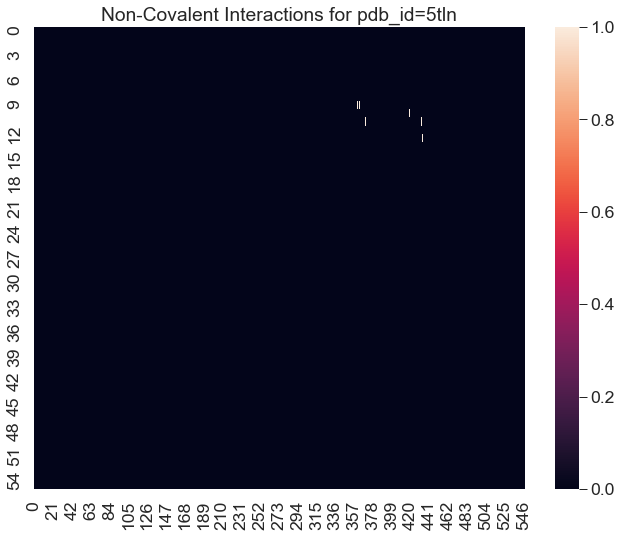

In [18]:
sns.set(context="paper", style="white",
        font_scale=2, palette="Blues_r",
        rc={"figure.figsize": (11,8.5), "legend.fontsize": 20,
                         "legend.title_fontsize" : 20, 
            "xtick.major.size": 8, "ytick.major.size": 8,
            "axes.spines.top" : False, 
            "axes.spines.right" : False,
           "lines.linewidth" : 3, 
           "font.family" : "sans-serif", 
            "font.sans-serif" : "Arial"
           })

fig, ax = plt.subplots()
plt.title("Non-Covalent Interactions for pdb_id="+pdb_id)
plt.xlabel("Atom Indices")
plt.ylabel("Residue Indices")
sns.heatmap(interaction_matrix)